In [25]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import gzip
import zipfile
import shutil
import os
import idx2numpy
from PIL import Image, ImageOps

In [3]:
decompressed_path = "./decompressed_files"

In [4]:
train_images = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-digits-train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-digits-train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-digits-test-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-digits-test-labels-idx1-ubyte')

print('Training images shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)

Training images shape: (240000, 28, 28)
Training labels shape: (240000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [10]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [11]:
rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Limit tree depth to prevent overfitting
    random_state=42,
    n_jobs=-1         # Use all CPU cores
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [12]:
y_pred = rf.predict(X_test)

In [13]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4852
           1       0.97      0.98      0.98      4775
           2       0.96      0.97      0.97      4806
           3       0.95      0.94      0.95      4765
           4       0.95      0.96      0.96      4851
           5       0.97      0.94      0.95      4857
           6       0.97      0.98      0.98      4769
           7       0.97      0.94      0.95      4664
           8       0.94      0.91      0.93      4918
           9       0.89      0.95      0.92      4743

    accuracy                           0.96     48000
   macro avg       0.96      0.96      0.96     48000
weighted avg       0.96      0.96      0.96     48000



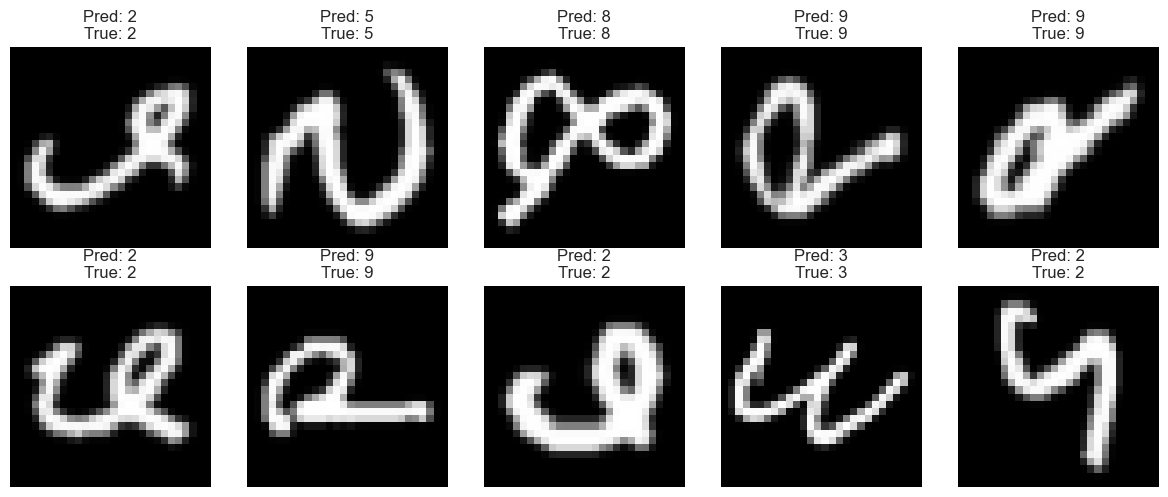

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [18]:
def load_images(folder):
    data = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L') 
        
            
            data.append(img)
    
    return np.array(data)

In [19]:
images = load_images("my_images")

In [21]:
images = images.reshape(images.shape[0], 28*28)

In [23]:
my_labels = np.array([0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9])

In [22]:
y_my_pred = rf.predict(images)

In [24]:
print(f"Accuracy: {accuracy_score(my_labels, y_my_pred):.4f}")
print(classification_report(my_labels, y_my_pred))

Accuracy: 0.1333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.30      1.00      0.46         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.07      0.33      0.11         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3

    accuracy                           0.13        30
   macro avg       0.04      0.13      0.06        30
weighted avg       0.04      0.13      0.06        30



C:\Users\JS\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JS\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JS\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

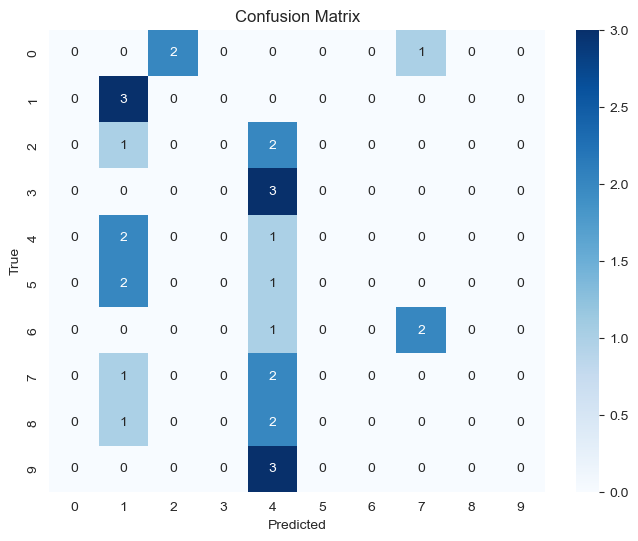

In [26]:
cm = confusion_matrix(my_labels, y_my_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()